In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline
%load_ext lab_black

In [2]:
df = pd.read_csv("../data/processed/county_data_with_census.csv")
test = pd.read_csv("../data/raw/test.csv")

In [3]:
df.head(20)

,cfips,year,CTYNAME,POPESTIMATE2020,POPESTIMATE2021,STNAME,active,county,first_day_of_month,median_hh_inc,microbusiness_density,pct_bb,pct_college,pct_foreign_born,pct_it_workers,pop_group_2020,quarter,row_id,state
0,1001,2019,Autauga County,58877.0,59095.0,Alabama,1249.0,Autauga County,2019-08-01,58731.0,3.007682,80.6,16.1,2.3,0.7,medium,3.0,1001_2019-08-01,Alabama
1,1001,2019,Autauga County,58877.0,59095.0,Alabama,1198.0,Autauga County,2019-09-01,58731.0,2.884870,80.6,16.1,2.3,0.7,medium,3.0,1001_2019-09-01,Alabama
2,1001,2019,Autauga County,58877.0,59095.0,Alabama,1269.0,Autauga County,2019-10-01,58731.0,3.055843,80.6,16.1,2.3,0.7,medium,4.0,1001_2019-10-01,Alabama
3,1001,2019,Autauga County,58877.0,59095.0,Alabama,1243.0,Autauga County,2019-11-01,58731.0,2.993233,80.6,16.1,2.3,0.7,medium,4.0,1001_2019-11-01,Alabama
4,1001,2019,Autauga County,58877.0,59095.0,Alabama,1243.0,Autauga County,2019-12-01,58731.0,2.993233,80.6,16.1,2.3,0.7,medium,4.0,1001_2019-12-01,Alabama
5,1001,2020,Autauga County,58877.0,59095.0,Alabama,1242.0,Autauga County,2020-01-01,57982.0,2.969090,82.7,16.7,2.3,0.6,medium,1.0,1001_2020-01-01,Alabama
6,1001,2020,Autauga County,58877.0,59095.0,Alabama,1217.0,Autauga County,2020-02-01,57982.0,2.909326,82.7,16.7,2.3,0.6,medium,1.0,1001_2020-02-01,Alabama
7,1001,2020,Autauga County,58877.0,59095.0,Alabama,1227.0,Autauga County,2020-03-01,57982.0,2.933231,82.7,16.7,2.3,0.6,medium,1.0,1001_2020-03-01,Alabama
8,1001,2020,Autauga County,58877.0,59095.0,Alabama,1255.0,Autauga County,2020-04-01,57982.0,3.000167,82.7,16.7,2.3,0.6,medium,2.0,1001_2020-04-01,Alabama
9,1001,2020,Autauga County,58877.0,59095.0,Alabama,1257.0,Autauga County,2020-05-01,57982.0,3.004948,82.7,16.7,2.3,0.6,medium,2.0,1001_2020-05-01,Alabama


In [4]:
df.columns

Index(['cfips', 'year', 'CTYNAME', 'POPESTIMATE2020', 'POPESTIMATE2021',
       'STNAME', 'active', 'county', 'first_day_of_month', 'median_hh_inc',
       'microbusiness_density', 'pct_bb', 'pct_college', 'pct_foreign_born',
       'pct_it_workers', 'pop_group_2020', 'quarter', 'row_id', 'state'],
      dtype='object')

In [5]:
df["first_day_of_month"] = pd.to_datetime(df["first_day_of_month"])
test["first_day_of_month"] = pd.to_datetime(test["first_day_of_month"])
test.sort_values(["cfips", "first_day_of_month"], inplace=True)

In [6]:
ids = df["cfips"].unique()
x_train = np.arange(39).reshape((-1, 1))
x_test = np.arange(39, 47).reshape((-1, 1))
threshold = 0.1

In [7]:
labelencoder = LabelEncoder()
df["pop_group_2020_numeric"] = labelencoder.fit_transform(df["pop_group_2020"])

In [8]:
df.columns

Index(['cfips', 'year', 'CTYNAME', 'POPESTIMATE2020', 'POPESTIMATE2021',
       'STNAME', 'active', 'county', 'first_day_of_month', 'median_hh_inc',
       'microbusiness_density', 'pct_bb', 'pct_college', 'pct_foreign_born',
       'pct_it_workers', 'pop_group_2020', 'quarter', 'row_id', 'state',
       'pop_group_2020_numeric'],
      dtype='object')

<AxesSubplot:>

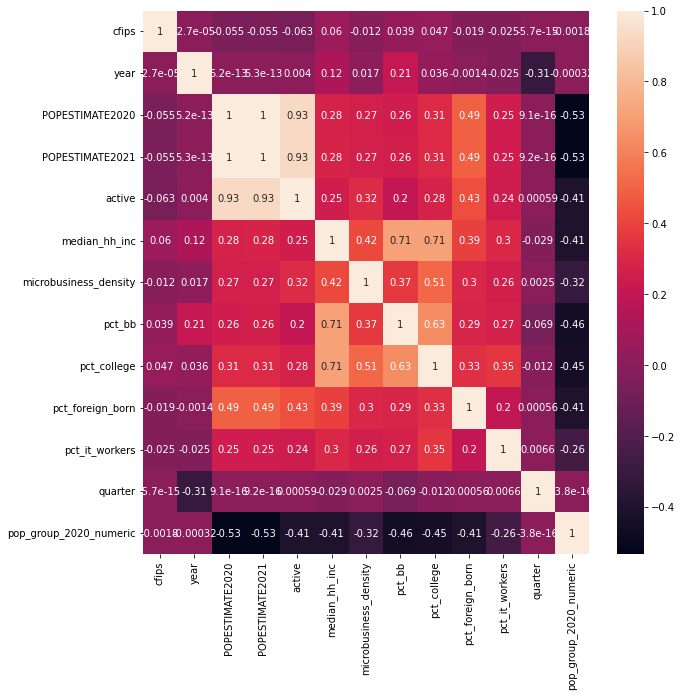

In [9]:
fig, axis = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

## Predictions of microdensity based on the data for that month, train on all the population

In [10]:
selected_df = df[df["first_day_of_month"] != "2022-10-01 00:00:00"]
useful_cols = [
    "cfips",
    "POPESTIMATE2021",
    "pop_group_2020_numeric",
    "median_hh_inc",
    "pct_bb",
    "pct_college",
    "pct_foreign_born",
    "pct_it_workers",
    "year",
]
X = selected_df[useful_cols]

X.fillna(method="ffill", inplace=True)
X = X.apply(pd.to_numeric, errors="coerce")
# convert all columns to numeric


y = selected_df["microbusiness_density"]
y.fillna(method="bfill", inplace=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

c:\Users\jsandh\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\Users\jsandh\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [11]:
X

,cfips,POPESTIMATE2021,pop_group_2020_numeric,median_hh_inc,pct_bb,pct_college,pct_foreign_born,pct_it_workers,year
0,1001,59095.0,1,58731.0,80.6,16.1,2.3,0.7,2019
1,1001,59095.0,1,58731.0,80.6,16.1,2.3,0.7,2019
2,1001,59095.0,1,58731.0,80.6,16.1,2.3,0.7,2019
3,1001,59095.0,1,58731.0,80.6,16.1,2.3,0.7,2019
4,1001,59095.0,1,58731.0,80.6,16.1,2.3,0.7,2019
...,...,...,...,...,...,...,...,...,...
122280,56045,6745.0,2,65566.0,81.3,13.9,1.6,0.0,2022
122281,56045,6745.0,2,65566.0,81.3,13.9,1.6,0.0,2022
122282,56045,6745.0,2,65566.0,81.3,13.9,1.6,0.0,2022
122283,56045,6745.0,2,65566.0,81.3,13.9,1.6,0.0,2022


In [12]:
# find nan in X and y
X_train.isna().sum()

cfips                     0
POPESTIMATE2021           0
pop_group_2020_numeric    0
median_hh_inc             0
pct_bb                    0
pct_college               0
pct_foreign_born          0
pct_it_workers            0
year                      0
dtype: int64

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95320 entries, 118497 to 16210
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cfips                   95320 non-null  int64  
 1   POPESTIMATE2021         95320 non-null  float64
 2   pop_group_2020_numeric  95320 non-null  int32  
 3   median_hh_inc           95320 non-null  float64
 4   pct_bb                  95320 non-null  float64
 5   pct_college             95320 non-null  float64
 6   pct_foreign_born        95320 non-null  float64
 7   pct_it_workers          95320 non-null  float64
 8   year                    95320 non-null  int64  
dtypes: float64(6), int32(1), int64(2)
memory usage: 6.9 MB


In [14]:
from lazypredict.Supervised import LazyRegressor

# import random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [15]:
# initialize the random forest regressor
reg = RandomForestRegressor()

In [16]:
# fit the regressor with X and y data
reg.fit(X_train, y_train)

RandomForestRegressor()

In [17]:
# plot regression tree
from sklearn.tree import plot_tree

In [18]:
# regressor results
reg.score(X_test, y_test)

0.9013601885826817

### Try to fill in the NaN for the non selected df, and see how the prediction for the last month goes

In [19]:
selected_cfips = selected_df.index
test_df = df[~df.index.isin(selected_cfips)]

In [20]:
test_df
X_test_df = test_df[useful_cols]